In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread("./pics/lena_gray_256.tif")


In [3]:
def quantize(image, levels):
    # levels = number of gray levels (e.g., 2, 4, 8, 16, 32...)
    step = 256 // levels
    return ((image // step) * step).astype(np.uint8)

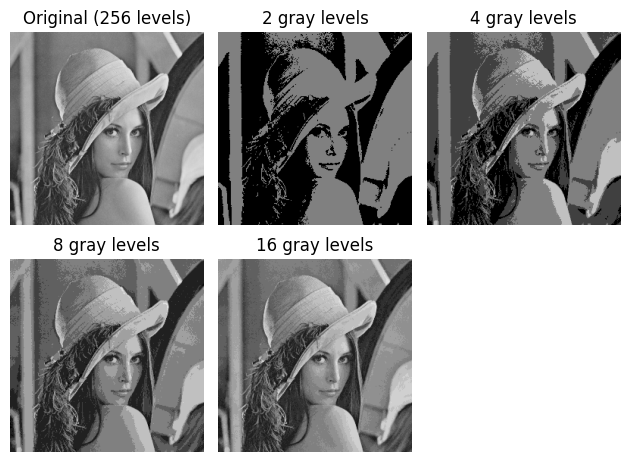

In [4]:
levels_list = [2, 4, 8, 16]   # examples of reduced quantization
plt.subplot(2, 3, 1)
plt.title("Original (256 levels)")
plt.imshow(img, cmap='gray')
plt.axis('off')
for i, L in enumerate(levels_list):
    q = quantize(img, L)
    plt.subplot(2, 3, i+2)
    plt.title(f"{L} gray levels")
    plt.imshow(q, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()



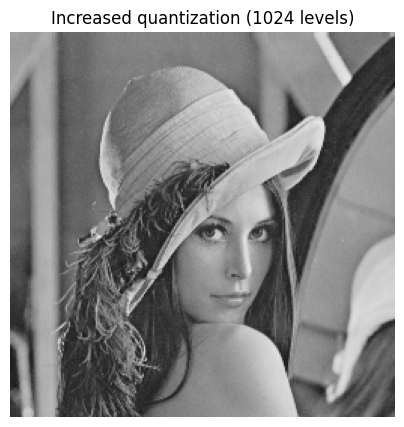

In [10]:
levels_high = 1024  # more than original 256 → smooth
img_float = img.astype(np.float32) / 255.0  # normalize
img_high = np.clip((img_float * (levels_high - 1)).round() / (levels_high - 1), 0, 1)

plt.figure(figsize=(5, 5))
plt.title("Increased quantization (1024 levels)")
plt.imshow(img_high, cmap='gray')
plt.axis('off')
plt.show()

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# ------------------- Load Image -------------------
img_path = r"C:\Users\AsiaLapTop.Com\OneDrive\Documents\Python_Image_Processing_Tasks#2\pics\lena_gray_256.tif"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load grayscale image

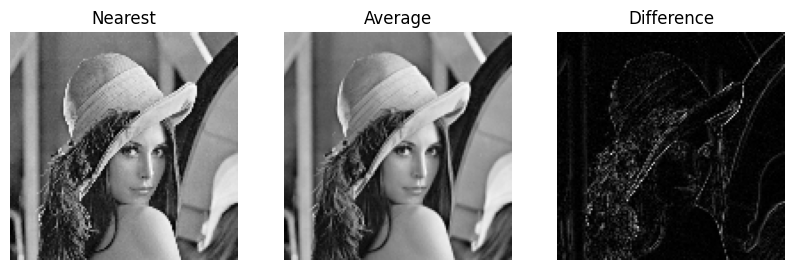

In [8]:
# --------- 1. Down Sampling with Different Methods ----------
def downsample_nearest(image, factor):
    # Nearest neighbor downsampling (simply pick every 'factor'-th pixel)
    return image[::factor, ::factor]

def downsample_average(image, factor):
    # Average pooling downsampling (take mean of each block)
    return image.reshape(image.shape[0]//factor, factor, image.shape[1]//factor, factor).mean(axis=(1,3)).astype(np.uint8)

factor = 2
ds_nearest = downsample_nearest(img, factor)
ds_avg = downsample_average(img, factor)

# Calculate difference between two downsampling methods
diff = np.abs(ds_nearest.astype(np.int16) - ds_avg.astype(np.int16))

# Display the results
plt.figure(figsize=(10,4))
plt.subplot(1,3,1); plt.title("Nearest"); plt.imshow(ds_nearest, cmap='gray'); plt.axis('off')
plt.subplot(1,3,2); plt.title("Average"); plt.imshow(ds_avg, cmap='gray'); plt.axis('off')
plt.subplot(1,3,3); plt.title("Difference"); plt.imshow(diff, cmap='gray'); plt.axis('off')
plt.show()

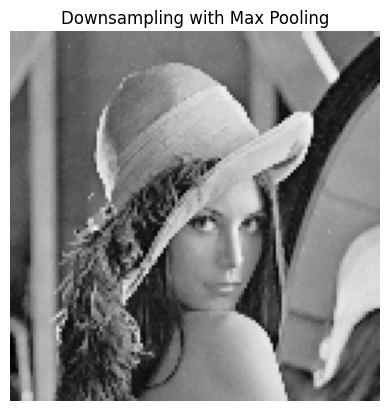

In [9]:
# --------- 2. Alternative Down Sampling Method (Max Pooling) ----------
def downsample_maxpool(image, factor):
    # Max pooling: take the maximum value in each block
    return image.reshape(image.shape[0]//factor, factor, image.shape[1]//factor, factor).max(axis=(1,3))

ds_max = downsample_maxpool(img, factor)
plt.figure()
plt.title("Downsampling with Max Pooling")
plt.imshow(ds_max, cmap='gray')
plt.axis('off')
plt.show()


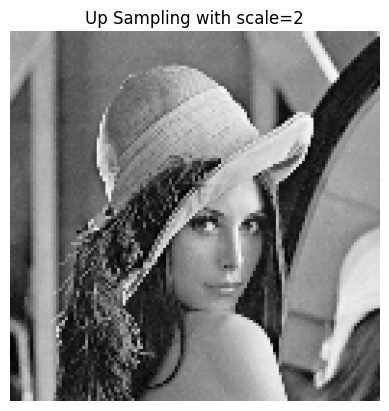

In [10]:
# --------- 3. Effect of Scale in Up Sampling ----------
# Larger scale → image enlarges; smaller scale → image shrinks
scale = 2
upsampled_img = cv2.resize(ds_nearest, (ds_nearest.shape[1]*scale, ds_nearest.shape[0]*scale), interpolation=cv2.INTER_NEAREST)
plt.figure()
plt.title(f"Up Sampling with scale={scale}")
plt.imshow(upsampled_img, cmap='gray')
plt.axis('off')
plt.show()

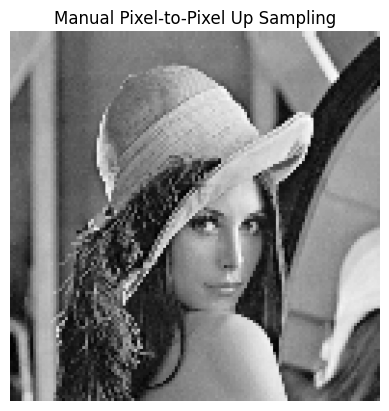

In [11]:
# --------- 4. Pixel-by-Pixel Up Sampling ----------
def pixel_to_pixel_upsample(image, scale):
    h, w = image.shape
    up_img = np.zeros((h*scale, w*scale), dtype=image.dtype)
    for i in range(h):
        for j in range(w):
            up_img[i*scale:(i+1)*scale, j*scale:(j+1)*scale] = image[i,j]  # replicate each pixel
    return up_img

upsampled_manual = pixel_to_pixel_upsample(ds_nearest, scale)
plt.figure()
plt.title("Manual Pixel-to-Pixel Up Sampling")
plt.imshow(upsampled_manual, cmap='gray')
plt.axis('off')
plt.show()

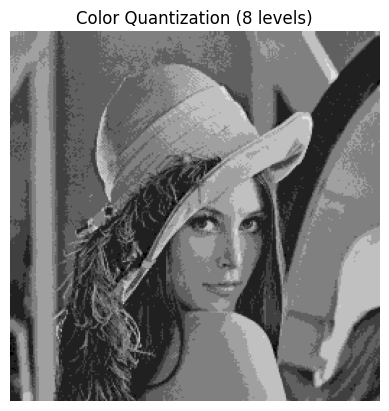

In [13]:
# --------- 5. Color Image Quantization ----------
img_color = cv2.imread(r"C:\Users\AsiaLapTop.Com\OneDrive\Documents\Python_Image_Processing_Tasks#2\pics\lena_gray_256.tif")
def quantize_color(image, levels):
    # Reduce number of color levels
    step = 256 // levels
    return ((image // step) * step).astype(np.uint8)

q_color = quantize_color(img_color, 8)
plt.figure()
plt.title("Color Quantization (8 levels)")
plt.imshow(cv2.cvtColor(q_color, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

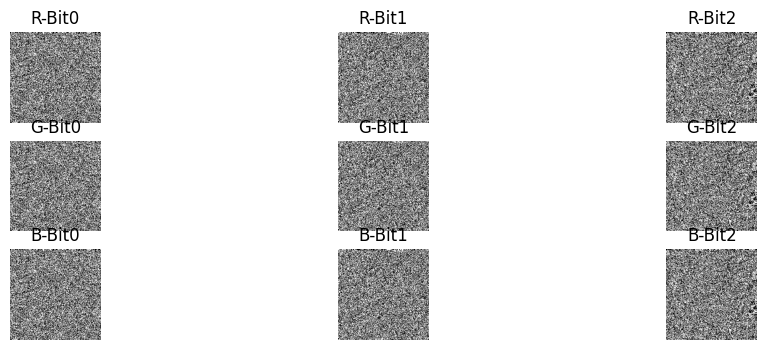

In [17]:
# --------- 6. Bitplanes for Three Color Images ----------
images_paths = [
    r"C:\Users\AsiaLapTop.Com\OneDrive\Documents\Python_Image_Processing_Tasks#2\pics\lena_gray_256.tif",
  
]

def bitplanes(channel):
    # Extract 8 bitplanes from a single channel
    planes = []
    for i in range(8):
        planes.append(((channel >> i) & 1) * 255)
    return planes

for path in images_paths:
    img_c = cv2.imread(path)
    img_rgb = cv2.cvtColor(img_c, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12,4))
    for c, color in enumerate(['R','G','B']):
        planes = bitplanes(img_c[:,:,c])
        for i, p in enumerate(planes[:3]):  # show first 3 bitplanes
            plt.subplot(3,3, c*3+i+1)
            plt.imshow(p, cmap='gray')
            plt.title(f"{color}-Bit{i}")
            plt.axis('off')
    plt.show()

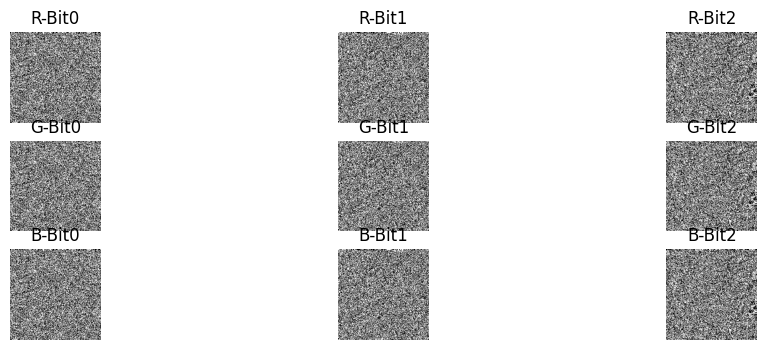

In [22]:
# --------- 6. Bitplanes for Three Color Images ----------
images_paths = [
    r"C:\Users\AsiaLapTop.Com\OneDrive\Documents\Python_Image_Processing_Tasks#2\pics\lena_gray_256.tif"
]

def bitplanes(channel):
    # Extract 8 bitplanes from a single channel
    planes = []
    for i in range(8):
        planes.append(((channel >> i) & 1) * 255)
    return planes

for path in images_paths:
    img_c = cv2.imread(path)
    img_rgb = cv2.cvtColor(img_c, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12,4))
    for c, color in enumerate(['R','G','B']):
        planes = bitplanes(img_c[:,:,c])
        for i, p in enumerate(planes[:3]):  # show first 3 bitplanes
            plt.subplot(3,3, c*3+i+1)
            plt.imshow(p, cmap='gray')
            plt.title(f"{color}-Bit{i}")
            plt.axis('off')
    plt.show()

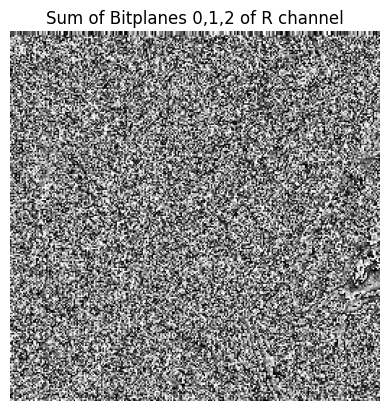

In [23]:
# --------- 7. Sum of Bitplanes ----------
img_r = img_color[:,:,2]  # Red channel
sum_planes = np.zeros_like(img_r)
for i in range(3):  # sum bitplanes 0,1,2
    sum_planes += ((img_r >> i) & 1) * (2**i)

plt.figure()
plt.title("Sum of Bitplanes 0,1,2 of R channel")
plt.imshow(sum_planes, cmap='gray')
plt.axis('off')
plt.show()

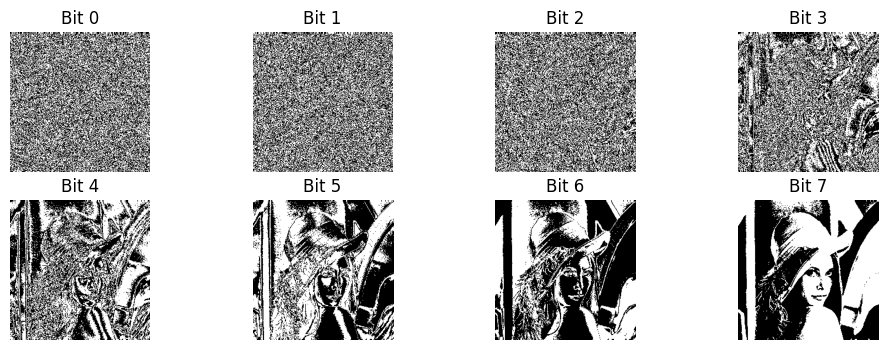

In [26]:
# --------- 8. Bitplanes of X-Ray Image ----------
xray = r"C:\Users\AsiaLapTop.Com\OneDrive\Documents\Python_Image_Processing_Tasks#2\pics\lena_gray_256.tif"
xray = cv2.imread(xray_path, cv2.IMREAD_GRAYSCALE)
planes_xray = bitplanes(xray)
plt.figure(figsize=(12,4))
for i, p in enumerate(planes_xray):
    plt.subplot(2,4,i+1)
    plt.imshow(p, cmap='gray')
    plt.title(f"Bit {i}")
    plt.axis('off')
plt.show()